# Photon Cut-based Fall17V2 ID variable study

In [1]:
import awkward1 as ak
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
 def flat_dim(arr):
        sub_arr = ak.flatten(arr)
        mask = ~ak.is_none(sub_arr)
        return ak.to_numpy(sub_arr[mask])

In [6]:
infile='data/data/7B56E217-555E-1C41-9494-491849A9835F_skim_2ElIdPt20.root'

In [7]:
events = NanoEventsFactory.from_root(infile, schemaclass=NanoAODSchema).events()

In [8]:
Electron = events.Electron
Photon   = events.Photon

### Cut based ID Fall17V2   
  - Link:https://twiki.cern.ch/twiki/bin/view/CMS/CutBasedPhotonIdentificationRun2

Text(0.5, 1.0, 'VutBased ID Fall17V2')

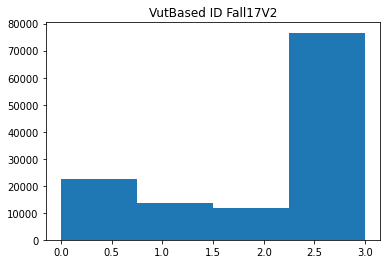

In [9]:
plt.hist(flat_dim(Photon.cutBased),bins=4)
plt.title('VutBased ID Fall17V2')

In [20]:
def Particle_selection(ele,pho):
    # Electron selection
    EleSelmask = (ele.pt > 25) & (np.abs(ele.eta) < 2.5) & (ele.cutBased > 2)

    # Photon selection
    # 0 Fail 1 Loose 2 Medium 3 Tight
    # -- HoE cut is added manually
    #PhoSelmaskEE = (pho.pt > 25) & (pho.cutBased > 1) &  pho.isScEtaEE & (pho.hoe < 0.0326)
    #PhoSelmaskEB = (pho.pt > 25) & (pho.cutBased > 1) &  pho.isScEtaEB & (pho.hoe < 0.02197)
    #PhoSelmask = PhoSelmaskEE | PhoSelmaskEB
    
    # -- Original Photon selection
    Pixel_seed_veto = ~pho.pixelSeed
    PhoSelmask = (pho.pt > 25) & (pho.cutBased > 1) & Pixel_seed_veto
    #PhoSelmask = (pho.pt > 25) & (pho.cutBased > 1)
    #Pixel_seed_veto = ~pho.pixelSeed
    return EleSelmask,PhoSelmask,

In [21]:
# Event Selection
Electron_mask, Photon_mask  = Particle_selection(Electron,Photon)
Ele_channel_mask = ak.num(Electron[Electron_mask]) > 1
Pho_channel_mask = ak.num(Photon[Photon_mask]) > 0

In [22]:
Ele_channel_events = events[Ele_channel_mask & Pho_channel_mask]

In [24]:
print(len(Ele_channel_events) / len(events))

0.013649082099228826


In [25]:
0.01 / 0.

0.016666666666666666

In [14]:
Ele = Ele_channel_events.Electron
Pho = Ele_channel_events.Photon

In [15]:
Electron_mask,Photon_mask = Particle_selection(Ele,Pho)
Ele_sel = Ele[Electron_mask]
Pho_sel = Pho[Photon_mask]

# Helper function: High PT argmax
def make_leading_pair(target,base):

    return target[ak.argmax(base.pt,axis=1,keepdims=True)]

leading_pho = make_leading_pair(Pho_sel,Pho_sel)

In [16]:
print( len(leading_pho) / len(events) * 100 )

65.79158316633267


In [17]:
# Photon
isEE_mask = leading_pho.isScEtaEE
isEB_mask = leading_pho.isScEtaEB

In [18]:
## EndCap Photon
EE_Pho = leading_pho[isEE_mask]

## Barrel Photon
EB_Pho = leading_pho[isEB_mask]

### HoverE (Not matched)  
 - EB: 0.02197
 - EE: 0.0326 

In [19]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.hoe)),ak.min(flat_dim(EE_Pho.hoe))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.hoe)),ak.min(flat_dim(EB_Pho.hoe))))

EE max:0.13037109375 min:0.0
EB max:0.106689453125 min:0.0


Text(0.5, 1.0, 'EB HoverE')

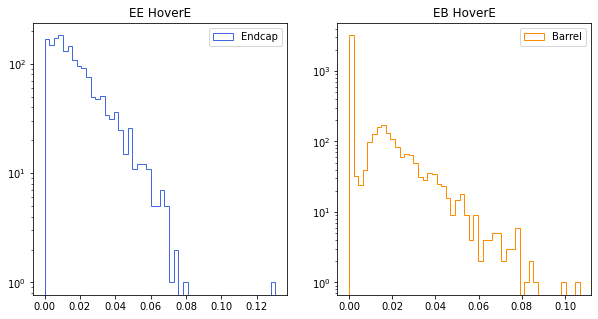

In [20]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.hoe),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE HoverE')

axs[1].hist(flat_dim(EB_Pho.hoe),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EB HoverE')

### sigma ietaieta  
 - EB: 0.01015
 - EE: 0.0272

In [21]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.sieie)),ak.min(flat_dim(EE_Pho.sieie))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.sieie)),ak.min(flat_dim(EB_Pho.sieie))))

EE max:0.027191162109375 min:0.01702880859375
EB max:0.01013946533203125 min:0.0024929046630859375


Text(0.5, 1.0, 'EE sieie')

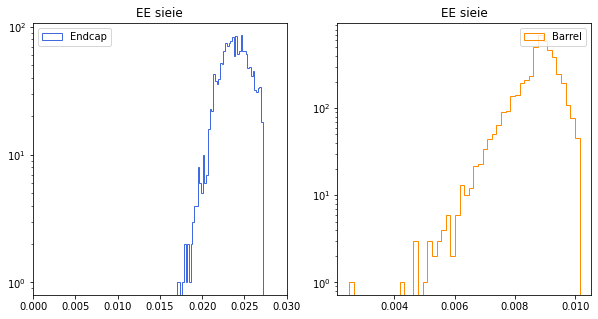

In [22]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.sieie),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE sieie')
axs[0].set_xlim(0,0.03)

axs[1].hist(flat_dim(EB_Pho.sieie),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EE sieie')

### Charged hadron isolation  
 - EB: 1.141
 - EE: 1.051

In [23]:
print("EE max:{0} min:{1}".format(ak.max(flat_dim(EE_Pho.pfRelIso03_chg)),ak.min(flat_dim(EE_Pho.pfRelIso03_chg))))
print("EB max:{0} min:{1}".format(ak.max(flat_dim(EB_Pho.pfRelIso03_chg)),ak.min(flat_dim(EB_Pho.pfRelIso03_chg))))

EE max:0.033859360963106155 min:0.0
EB max:0.04000825807452202 min:0.0


Text(0.5, 1.0, 'EE Charged hadron iso')

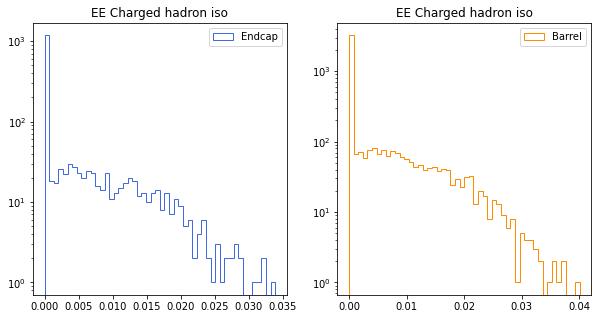

In [24]:
fig,axs = plt.subplots(1,2,figsize=(10,5))
axs[0].hist(flat_dim(EE_Pho.pfRelIso03_chg),bins=50,color='royalblue',histtype='step',label='Endcap')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].set_title('EE Charged hadron iso')
#axs[0].set_xlim(0,0.1)

axs[1].hist(flat_dim(EB_Pho.pfRelIso03_chg),bins=50,color='darkorange',histtype='step',label='Barrel')
axs[1].set_yscale('log')
axs[1].legend()
axs[1].set_title('EE Charged hadron iso')

In [81]:
for evt,idx in enumerate(Pho_sel.electronIdx[:5]):
    print(evt,idx)

0 [0, 1]
1 [1, 0]
2 [0, 1]
3 [0, 1]
4 [0]


In [83]:
for evt,pts in enumerate(Pho_sel.pt[:5]):
    print(evt,pts)

0 [45.2, 32.7]
1 [50.3, 49.3]
2 [39.7, 34.9]
3 [46.7, 39.4]
4 [41]


In [139]:
import math
def dR(ele,pho):
    deta = abs(ele.eta - pho.eta)
    if abs(ele.phi - pho.phi) > math.pi:
        dphi = 2*math.pi - abs(ele.phi - pho.phi)
    else:
        dphi = abs(ele.phi - pho.phi)
    return np.sqrt(deta*deta + dphi*dphi)

In [143]:
arr_dR=[]
for evt,idx_evt in enumerate(Pho_sel.electronIdx):
 
    if len(idx_evt) == 1:
        if not idx_evt[0] == -1:
            arr_dR.append(dR(Ele[evt][idx_evt[0]],Pho_sel[evt][0]))

    if len(idx_evt) == 2:
        if not idx_evt[0] == -1:
            arr_dR.append(dR(Ele[evt][idx_evt[0]],Pho_sel[evt][0]))
        if not idx_evt[1] == -1:
            arr_dR.append(dR(Ele[evt][idx_evt[1]],Pho_sel[evt][1]))

In [144]:
import matplotlib.pyplot as plt

(array([5.700e+01, 1.080e+02, 2.010e+02, 2.550e+02, 3.370e+02, 4.810e+02,
        5.920e+02, 6.750e+02, 8.420e+02, 1.144e+03, 1.171e+03, 1.137e+03,
        9.950e+02, 8.420e+02, 6.450e+02, 4.830e+02, 3.560e+02, 2.850e+02,
        2.080e+02, 1.610e+02, 9.100e+01, 6.600e+01, 3.400e+01, 4.200e+01,
        2.300e+01, 1.400e+01, 1.800e+01, 7.000e+00, 9.000e+00, 7.000e+00,
        4.000e+00, 8.000e+00, 4.000e+00, 4.000e+00, 3.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([0.00048828, 0.00205689, 0.0036255 , 0.00519411, 0.00676273,
        0.00833134, 0.00989995, 0.01146856, 0.01303717, 0.01460578,
        0.01617439, 0.017743  , 0.01931161, 0.02088023, 0.02244884,
        0.02401745, 0.02558606, 0.02715467, 0.02872328, 0.03029189,
        0.0318605 , 0.03342911, 0.03499772, 0.03656634, 0.03813495,
        0.03970356, 0.04127217, 0.04

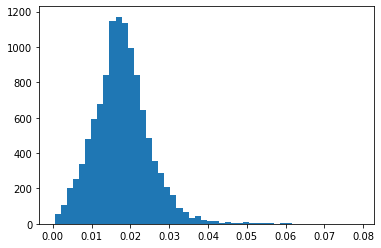

In [146]:
plt.hist(arr_dR,bins=50)